# Installing Yahoo Finanace Library(API)

In [ ]:
!pip install yfinance

# Importing libraries and Stock prices from '1-Jan-2021' to '31-Dec-2023'

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the tickers for the NIFTY sectoral indices
tickers = ['0P0000XW4N.BO', '^NSEI', '^CNXINFRA']

# Fetch historical data for the indices (last 3 years)
data = yf.download(tickers, start="2023-05-31", end="2024-05-31")['Adj Close']

# Display the first few rows of the data
print(data.head())


[*********************100%%**********************]  3 of 3 completed

Ticker      0P0000XW4N.BO    ^CNXINFRA         ^NSEI
Date                                                
2023-05-31      24.561899  5459.799805  18534.400391
2023-06-01      24.604700  5446.750000  18487.750000
2023-06-02      24.656700  5472.399902  18534.099609
2023-06-05      24.673700  5495.750000  18593.849609
2023-06-06      24.782000  5521.950195  18599.000000


# Caculating Daily Returns

In [ ]:
# Normalize each column to start at 100
normalized_df = data / data.iloc[0] * 100

print(normalized_df)

Ticker      0P0000XW4N.BO   ^CNXINFRA       ^NSEI
Date                                             
2023-05-31     100.000000  100.000000  100.000000
2023-06-01     100.174257   99.760984   99.748304
2023-06-02     100.385968  100.230779   99.998377
2023-06-05     100.455181  100.658453  100.320751
2023-06-06     100.896105  101.138327  100.348539
...                   ...         ...         ...
2024-05-24     185.133072  162.201925  123.862111
2024-05-27     184.940907  162.002277  123.729113
2024-05-28     182.443142  160.723845  123.490104
2024-05-29     181.838537  159.731131  122.500317
2024-05-30     179.447858  157.937106  121.334653

[245 rows x 3 columns]


In [ ]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Display the first few rows of returns
print(returns.head())


Ticker      0P0000XW4N.BO  ^CNXINFRA     ^NSEI
Date                                          
2023-06-01       0.001743  -0.002390 -0.002517
2023-06-02       0.002113   0.004709  0.002507
2023-06-05       0.000689   0.004267  0.003224
2023-06-06       0.004389   0.004767  0.000277
2023-06-07       0.007187   0.011110  0.006850


## Plotting the time series of closing prices

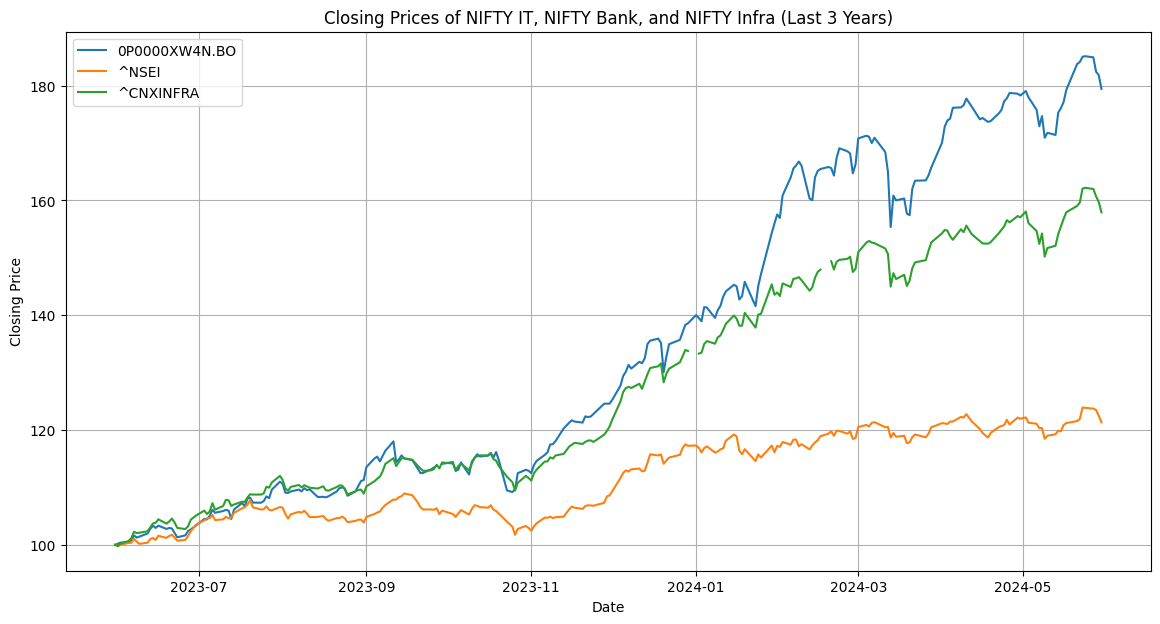

In [ ]:
# Plot the time series of closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(normalized_df[ticker], label=ticker)
plt.title('Closing Prices of NIFTY IT, NIFTY Bank, and NIFTY Infra (Last 3 Years)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


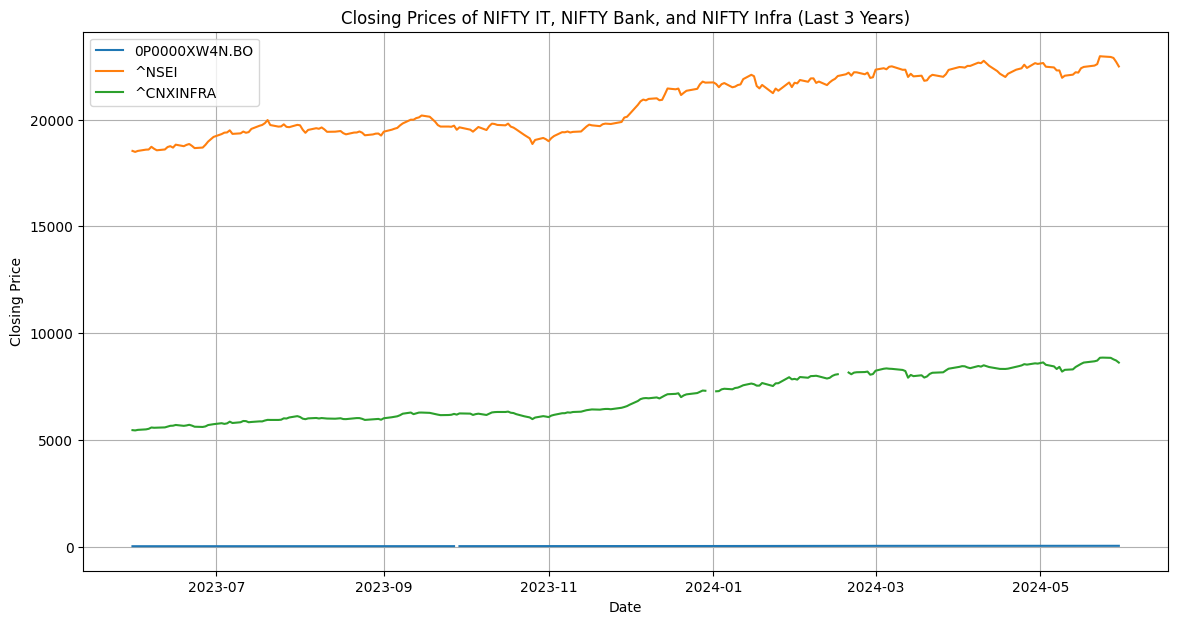

In [ ]:
# Plot the time series of closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title('Closing Prices of NIFTY IT, NIFTY Bank, and NIFTY Infra (Last 3 Years)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# Descriptive Analysis of Returns

In [ ]:
# Obtain descriptive statistics for returns
descriptive_stats = returns.describe()
print(descriptive_stats)


Ticker  0P0000XW4N.BO   ^CNXINFRA       ^NSEI
count      244.000000  244.000000  244.000000
mean         0.002470    0.001911    0.000814
std          0.011892    0.008463    0.006459
min         -0.058098   -0.037684   -0.020894
25%         -0.002249   -0.002411   -0.003264
50%          0.002768    0.002598    0.001475
75%          0.008099    0.007219    0.004995
max          0.048900    0.036713    0.020668


# Histogram of Returns

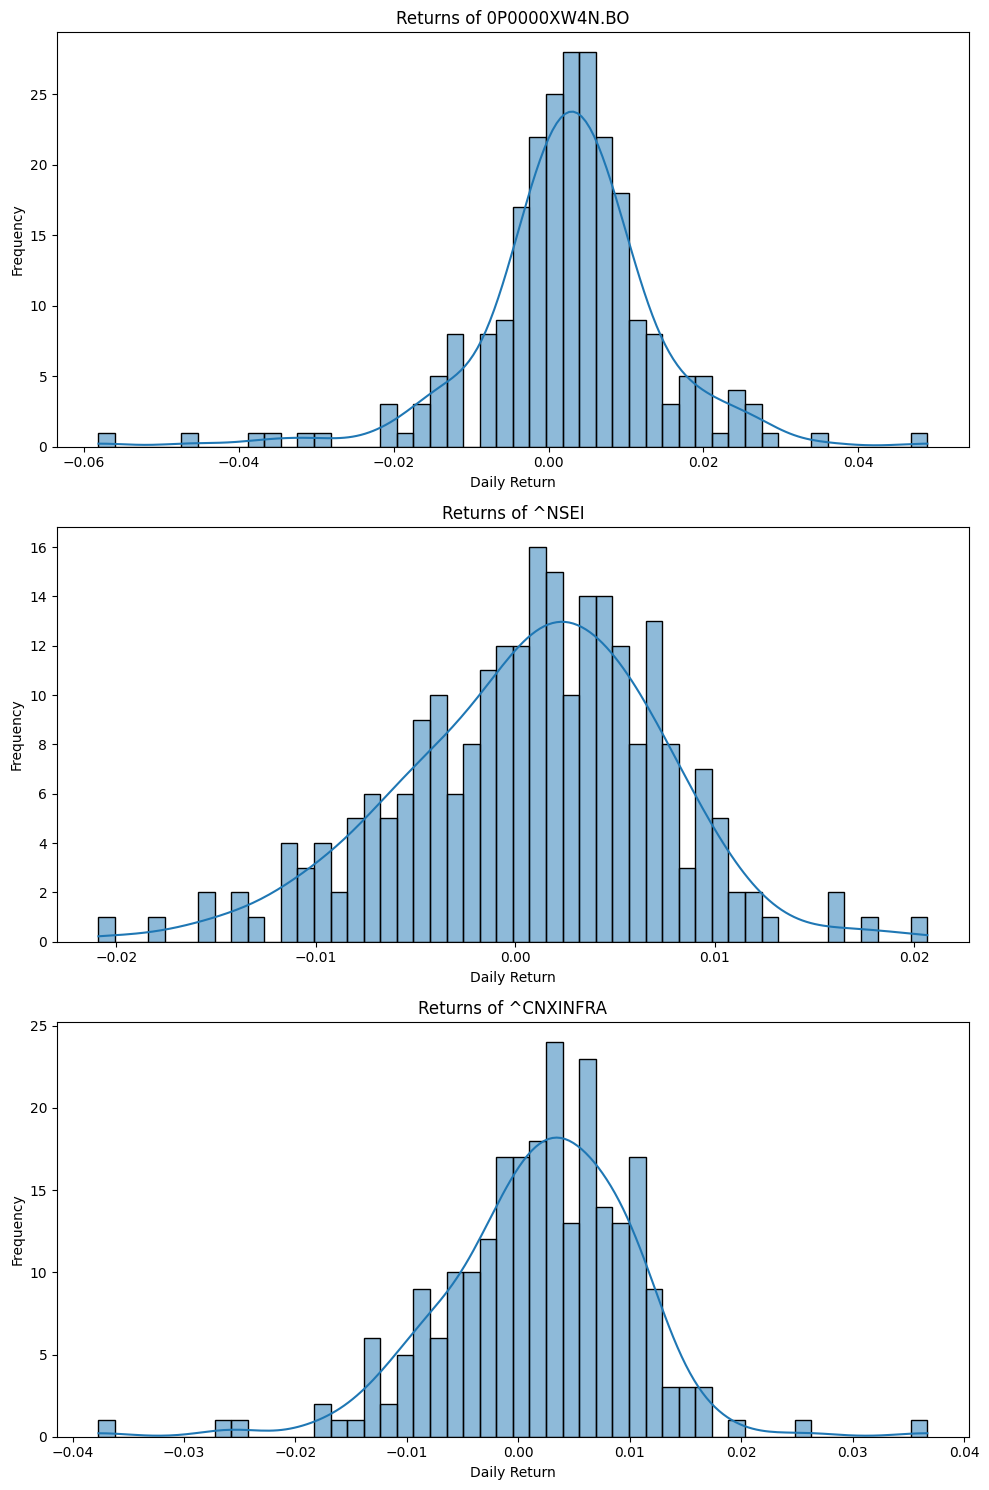

In [ ]:
# Plot histograms of returns
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, ticker in enumerate(tickers):
    sns.histplot(returns[ticker], bins=50, kde=True, ax=axs[i])
    axs[i].set_title(f'Returns of {ticker}')
    axs[i].set_xlabel('Daily Return')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


# Combined Histogram for Comparision

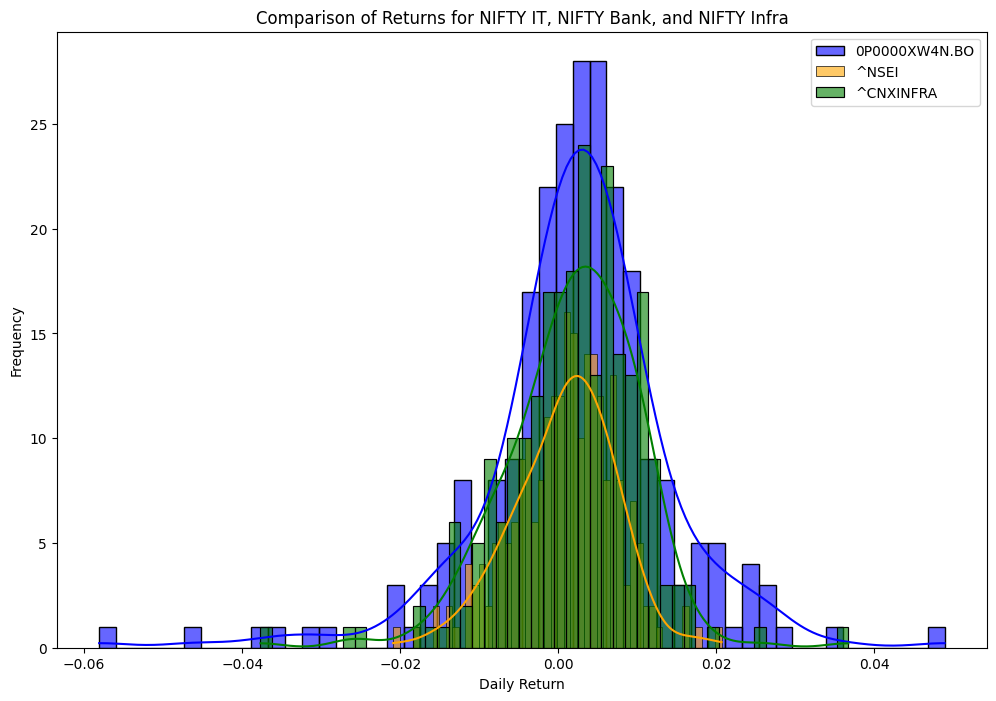

In [ ]:
plt.figure(figsize=(12, 8))
for ticker, color in zip(tickers, ['blue', 'orange', 'green']):
    sns.histplot(returns[ticker], bins=50, kde=True, label=ticker, color=color, alpha=0.6)
plt.title('Comparison of Returns for NIFTY IT, NIFTY Bank, and NIFTY Infra')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Return Histogram Analysis

In [ ]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = returns.apply(skew)
kurt = returns.apply(kurtosis)

# Display skewness and kurtosis
print("Skewness of returns:")
print(skewness)
print("\nKurtosis of returns:")
print(kurt)

Skewness of returns:
Ticker
0P0000XW4N.BO   -0.785892
^CNXINFRA       -0.515321
^NSEI           -0.296732
dtype: float64

Kurtosis of returns:
Ticker
0P0000XW4N.BO    4.760050
^CNXINFRA        2.795761
^NSEI            0.508448
dtype: float64


# Plotting Correlation Matrix

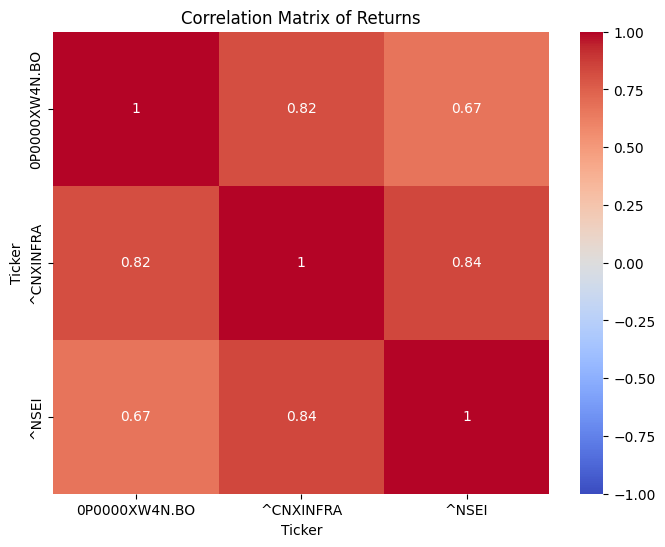

In [ ]:
# Calculate correlation matrix
correlation_matrix = returns.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Returns')
plt.show()


# Calculating Weights of Stocks for Combined Index Based on Correlation




In [ ]:
# Calculate weights based on average correlation
average_correlation = correlation_matrix.mean(axis=1)
inverse_correlation = 1 / average_correlation
weights = inverse_correlation / inverse_correlation.sum()

# Display weights
print("Weights for each index:")
for ticker, weight in zip(tickers, weights):
    print(f"{ticker}: {weight:.4f}")

# Calculate the combined index
combined_returns = (returns * weights).sum(axis=1)

# Normalize combined index to start at 100
combined_index = (1 + combined_returns).cumprod() * 100

# Display the first few rows of the combined index
print(combined_index.head())
combined_index.tail()

Weights for each index:
0P0000XW4N.BO: 0.3415
^NSEI: 0.3198
^CNXINFRA: 0.3387
Date
2023-06-01     99.897834
2023-06-02    100.205198
2023-06-05    100.474929
2023-06-06    100.788140
2023-06-07    101.627420
dtype: float64


Date
2024-05-24    155.208780
2024-05-27    155.036223
2024-05-28    153.828446
2024-05-29    152.932917
2024-05-30    151.204069
dtype: float64

# Composition of Combined Index

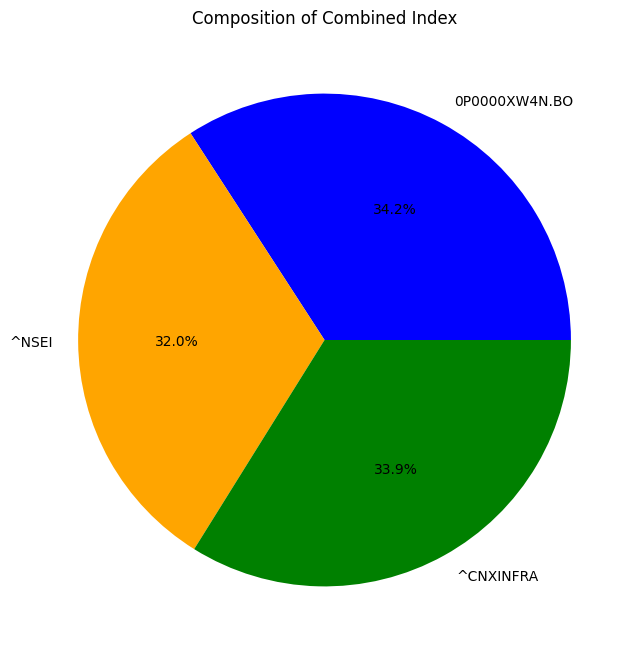

In [ ]:
# Plot the weights as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weights, labels=tickers, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
plt.title('Composition of Combined Index')
plt.show()


# Plotting Return of Combined Index

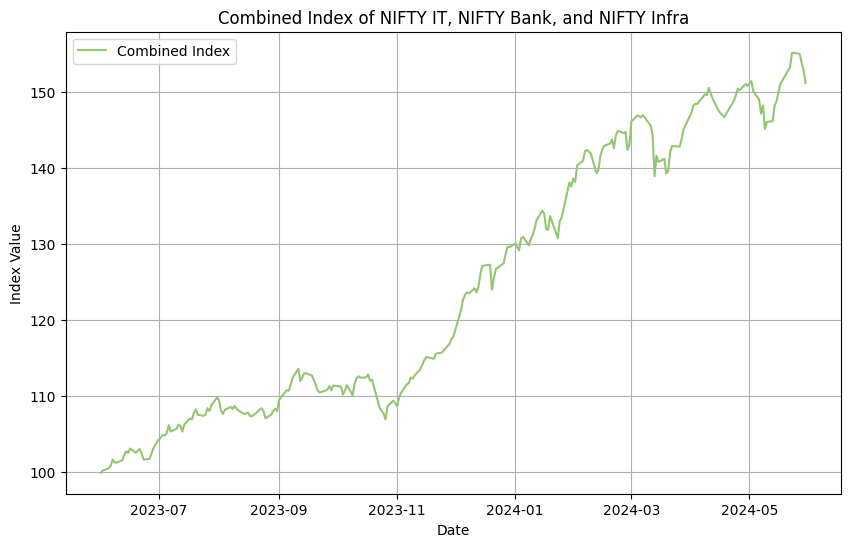

In [ ]:
# Plot the combined index
plt.figure(figsize=(10, 6))
plt.plot(combined_index, label='Combined Index', color='#93c572')
plt.title('Combined Index of NIFTY IT, NIFTY Bank, and NIFTY Infra')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


# Risk Vs Return of Combined Index

In [ ]:
# Calculate the mean return and standard deviation (risk)
mean_return = combined_returns.mean()
risk = combined_returns.std()

print(f"Return of the Combined Index: {mean_return:.4f}")
print(f"Risk (Standard Deviation) of the Combined Index: {risk:.4f}")

# Assuming a risk-free rate of 0 (for simplicity)
risk_free_rate = 0

# Calculate the Sharpe Ratio
sharpe_ratio = (mean_return - risk_free_rate) / risk


# risk vs. return
print(f"Mean Return: {mean_return:.4f}")
print(f"Standard Deviation: {risk:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Return of the Combined Index: 0.0017
Risk (Standard Deviation) of the Combined Index: 0.0083
Mean Return: 0.0017
Standard Deviation: 0.0083
Sharpe Ratio: 0.2092


# Risk Vs Return Analysis


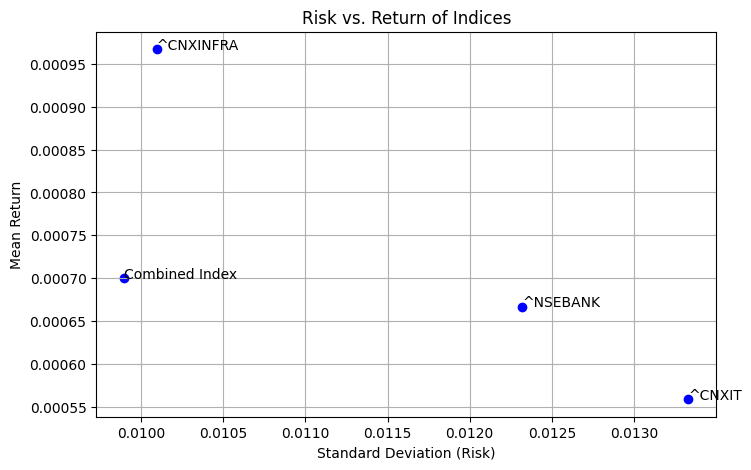

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming we have mean returns and standard deviations for each index and the combined index
data = {
    'Index': ['^CNXINFRA', '^CNXIT', '^NSEBANK', 'Combined Index'],
    'Mean Return': [0.000967, 0.000559, 0.000667, 0.0007],
    'Standard Deviation': [0.010096, 0.013328, 0.012319, 0.0099]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))

# Scatter plot
plt.scatter(df['Standard Deviation'], df['Mean Return'], color='blue')

# Annotate each point with the index name
for i in range(len(df)):
    plt.annotate(df['Index'][i], (df['Standard Deviation'][i], df['Mean Return'][i]))

# Add labels and title
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Mean Return')
plt.title('Risk vs. Return of Indices')

# Display the plot
plt.grid(True)
plt.show()
